In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
import seaborn as sns
from optuna.pruners import SuccessiveHalvingPruner,MedianPruner
import joblib
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['KAGGLE_USERNAME']=os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY']=os.getenv('KAGGLE_KEY')

In [4]:
import kagglehub

# This automatically downloads and unzips the dataset to ~/.kagglehub
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\aishw\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [5]:
os.listdir(path)

['audi.csv',
 'bmw.csv',
 'cclass.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'unclean cclass.csv',
 'unclean focus.csv',
 'vauxhall.csv',
 'vw.csv']

In [6]:
audi_path=os.path.join(path,'audi.csv')
bmw_path=os.path.join(path,'bmw.csv')
cclass_path=os.path.join(path,'cclass.csv')
focus_path=os.path.join(path,'focus.csv')
ford_path=os.path.join(path,'ford.csv')
hyundi_path=os.path.join(path,'hyundi.csv')
merc_path=os.path.join(path,'merc.csv')
skoda_path=os.path.join(path,'skoda.csv')
toyota_path=os.path.join(path,'toyota.csv')
unclean_cclass_path=os.path.join(path,'unclean cclass.csv')
unclean_focus_path=os.path.join(path,'unclean focus.csv')
vauxhall_path=os.path.join(path,'vauxhall.csv')
vw_path=os.path.join(path,'vw.csv')

In [7]:
audi_data=pd.read_csv(audi_path)
bmw_data=pd.read_csv(bmw_path)
cclass_data=pd.read_csv(cclass_path)
focus_data=pd.read_csv(focus_path)
ford_data=pd.read_csv(ford_path)
hyundi_data=pd.read_csv(hyundi_path)
merc_data=pd.read_csv(merc_path)
skoda_data=pd.read_csv(skoda_path)
toyota_data=pd.read_csv(toyota_path)
unclean_cclass_data=pd.read_csv(unclean_cclass_path)
unclean_focus_data=pd.read_csv(unclean_focus_path)
vauxhall_data=pd.read_csv(vauxhall_path)
vw_data=pd.read_csv(vw_path)

In [8]:
audi_data['brand']='Audi'
bmw_data['brand']='BMW'
cclass_data['brand']='cclass'
focus_data['brand']='Focus'
ford_data['brand']='Ford'
hyundi_data['brand']='Hyundi'
merc_data['brand']='Merc'
skoda_data['brand']='Skoda'
toyota_data['brand']='toyota'
vauxhall_data['brand']='Vauxhall'
vw_data['brand']='VW'

In [10]:
dfs = [
    audi_data,
    bmw_data,
    cclass_data,
    focus_data,
    ford_data,
    hyundi_data,
    merc_data,
    skoda_data,
    toyota_data,
    unclean_cclass_data,
    unclean_focus_data,
    vauxhall_data,
    vw_data
]

# Get the columns of the first DataFrame as a set
base_columns = set(dfs[0].columns)

# Check if all other DataFrames have the same columns
all_same_columns = all(set(df.columns) == base_columns for df in dfs)

print("All DataFrames have the same columns:", all_same_columns)

All DataFrames have the same columns: False


In [11]:
print(audi_data.columns)
print(bmw_data.columns)
print(cclass_data.columns)
print(focus_data.columns)
print(ford_data.columns)
print(hyundi_data.columns)
print(merc_data.columns)
print(skoda_data.columns)
print(toyota_data.columns)
print(unclean_cclass_data.columns)
print(unclean_focus_data.columns)
print(vw_data.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mi

In [12]:
hyundi_data=hyundi_data.rename(columns={'tax(£)':'tax'})
hyundi_data


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundi
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundi
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundi
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


## Fill the columns with NAN if not present

In [13]:
columns_to_add=[focus_data,cclass_data]
columns=['tax','mpg']
for df in columns_to_add:
    for col in columns:
        if col not in df.columns:
            df[col]=np.nan

In [15]:
dfs = [
    audi_data,
    bmw_data,
    cclass_data,
    focus_data,
    ford_data,
    hyundi_data,
    merc_data,
    skoda_data,
    toyota_data,
    vauxhall_data,
    vw_data
]

# Get the columns of the first DataFrame as a set
base_columns = set(dfs[0].columns)

# Check if all other DataFrames have the same columns
all_same_columns = all(set(df.columns) == base_columns for df in dfs)

print("All DataFrames have the same columns:", all_same_columns)

All DataFrames have the same columns: True


In [26]:
data=pd.concat(dfs,ignore_index=True)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


In [17]:
data['brand'].value_counts()

brand
Ford        17965
VW          15157
Vauxhall    13632
Merc        13119
BMW         10781
Audi        10668
toyota       6738
Skoda        6267
Focus        5454
Hyundi       4860
cclass       3899
Name: count, dtype: int64

In [14]:
data.shape

(94908, 9)

In [27]:
data.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
brand              0
dtype: int64

In [ ]:
missing_medians_tax = data.groupby('brand')['tax'].median().isna()
print("Brands with NaN tax median:\n", missing_medians_tax[missing_medians_tax].index.tolist())

In [ ]:
data['tax'] = data['tax'].fillna(data.groupby('brand')['tax'].transform('median'))
data['mpg'] = data['mpg'].fillna(data.groupby('brand')['mpg'].transform('median'))

data['tax'] = data['tax'].fillna(data['tax'].median())
data['mpg'] = data['mpg'].fillna(data['mpg'].median())
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

In [16]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [29]:
data.to_csv('data/used_car_price_prediction.csv',index=None)

In [102]:
data=pd.read_csv('data/used_car_price_prediction.csv')
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
dtype: object

## Data Visualizations

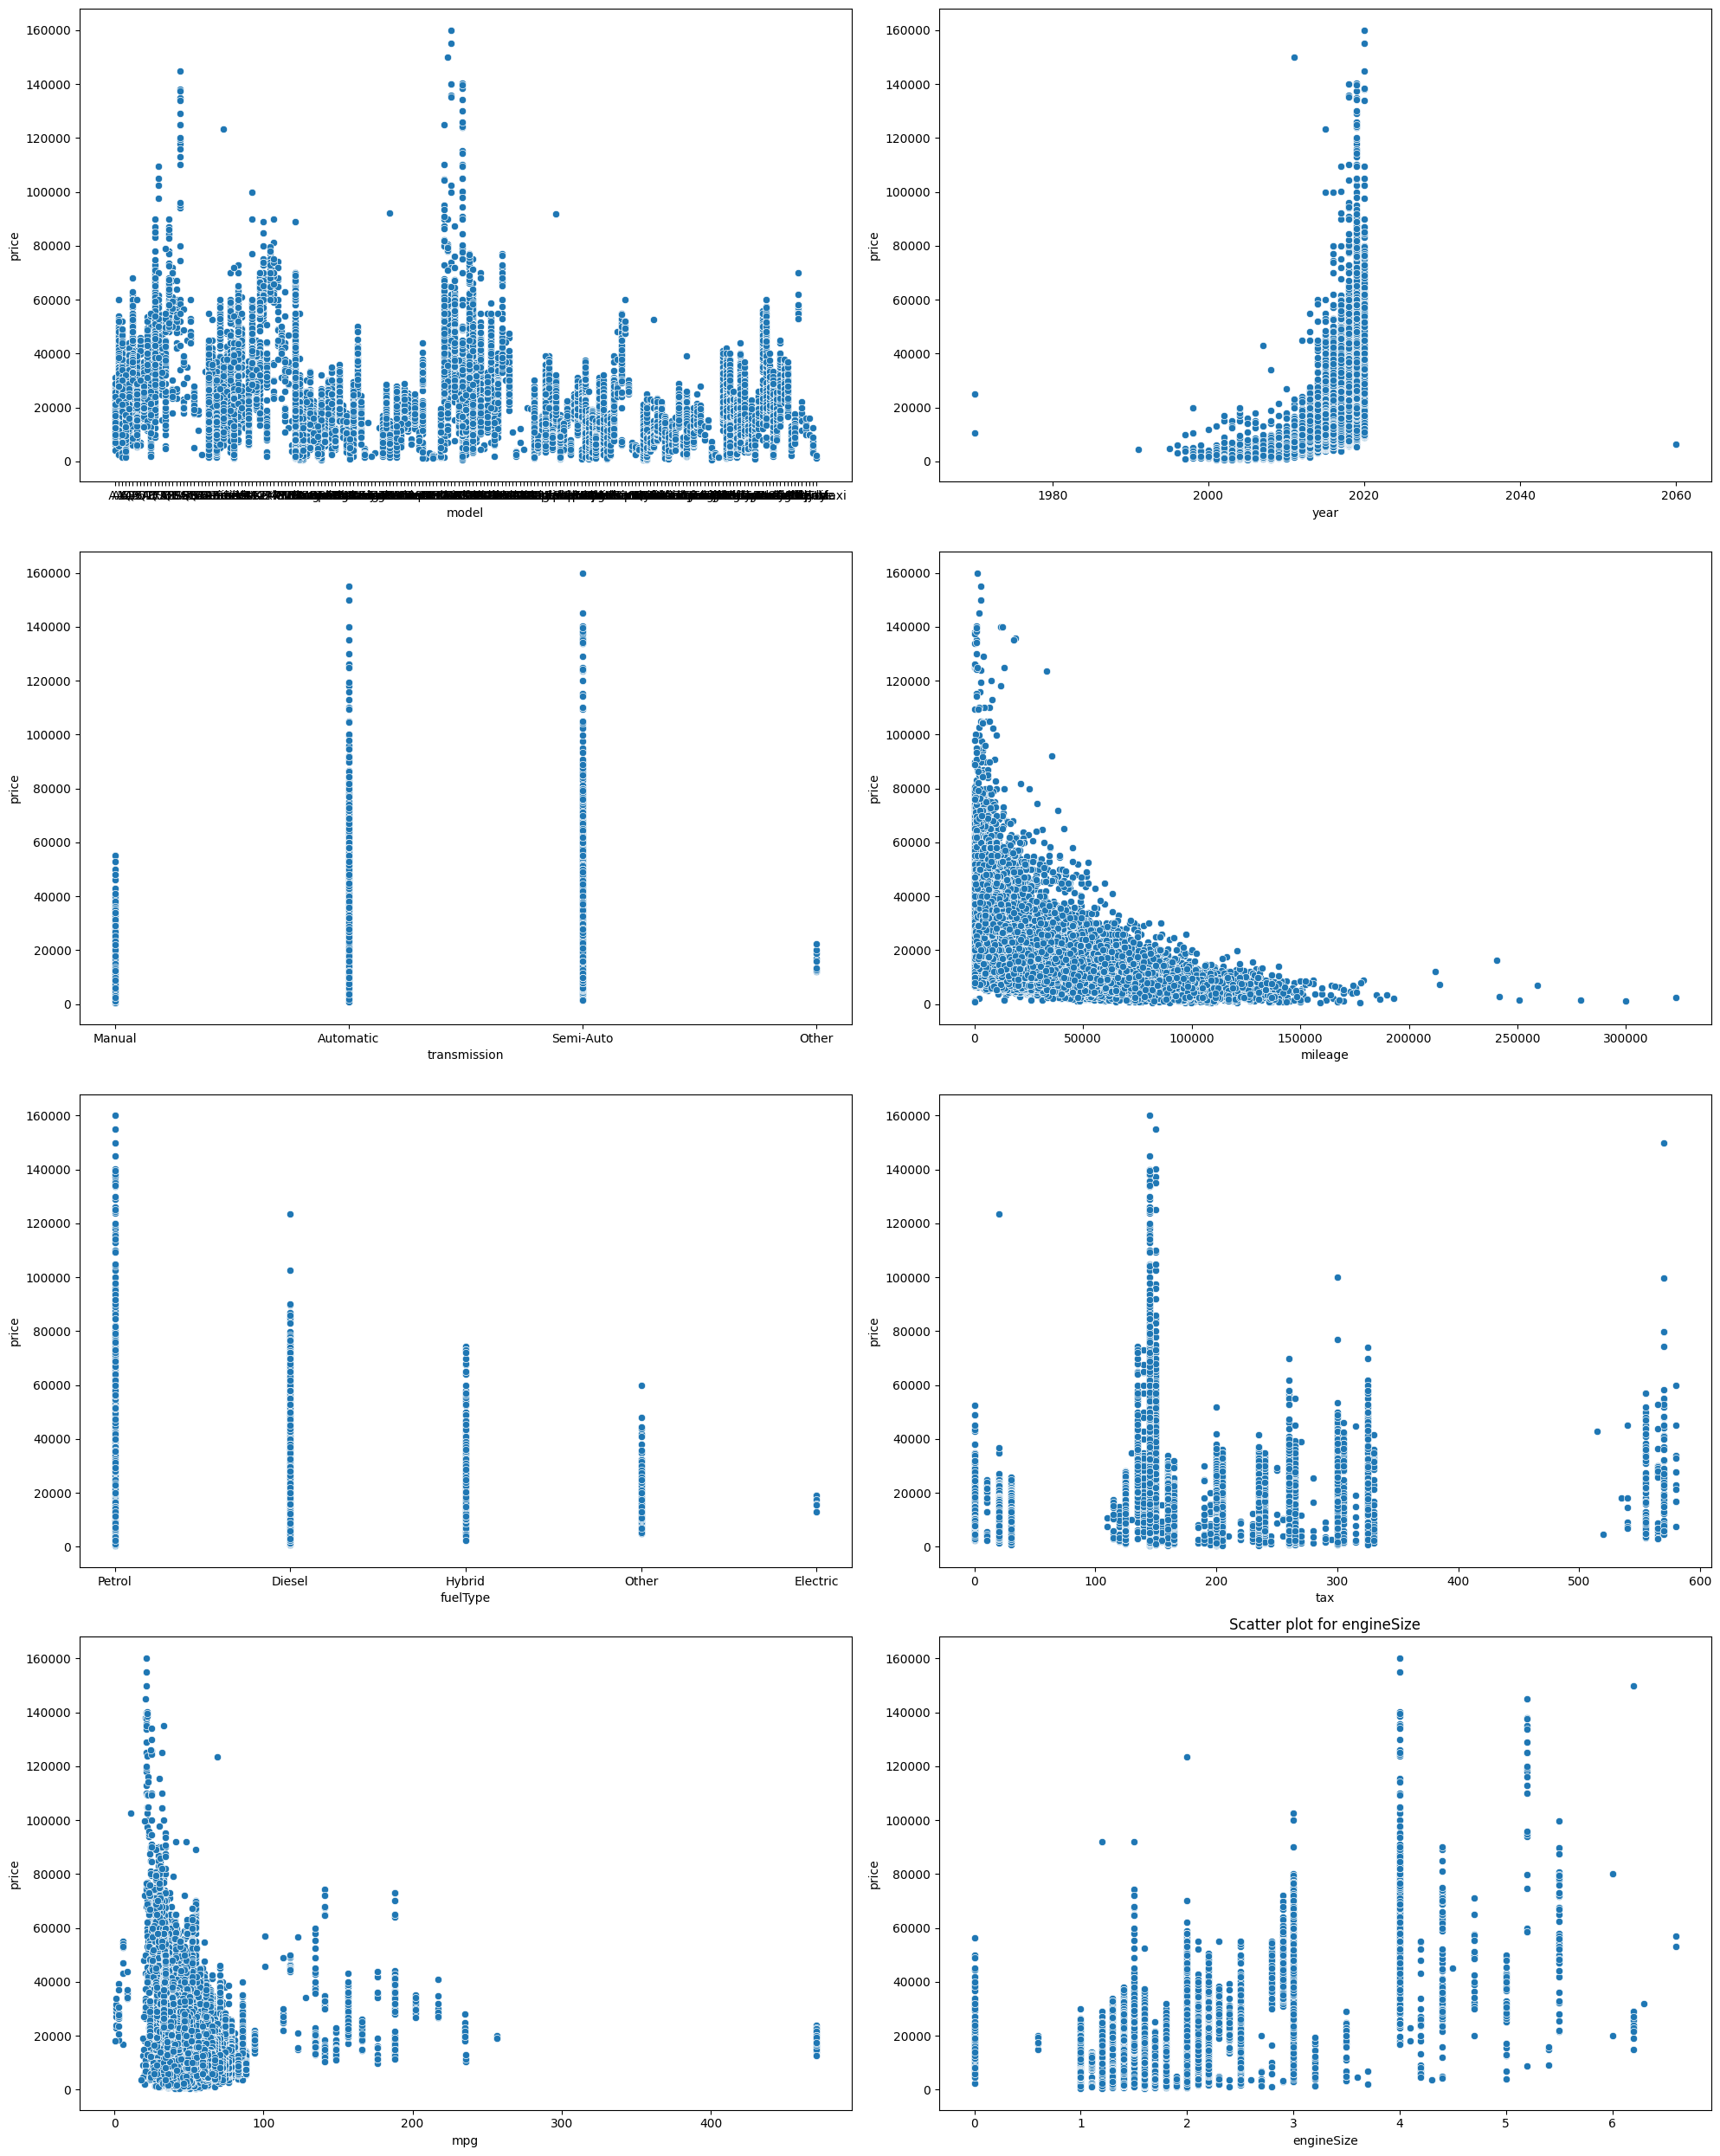

In [30]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.scatterplot(x=col,y='price',data=data,ax=ax)
    plt.title(f'Scatter plot for {col}')
    plt.xlabel(col)
    plt.ylabel('price')
plt.tight_layout()
plt.show()

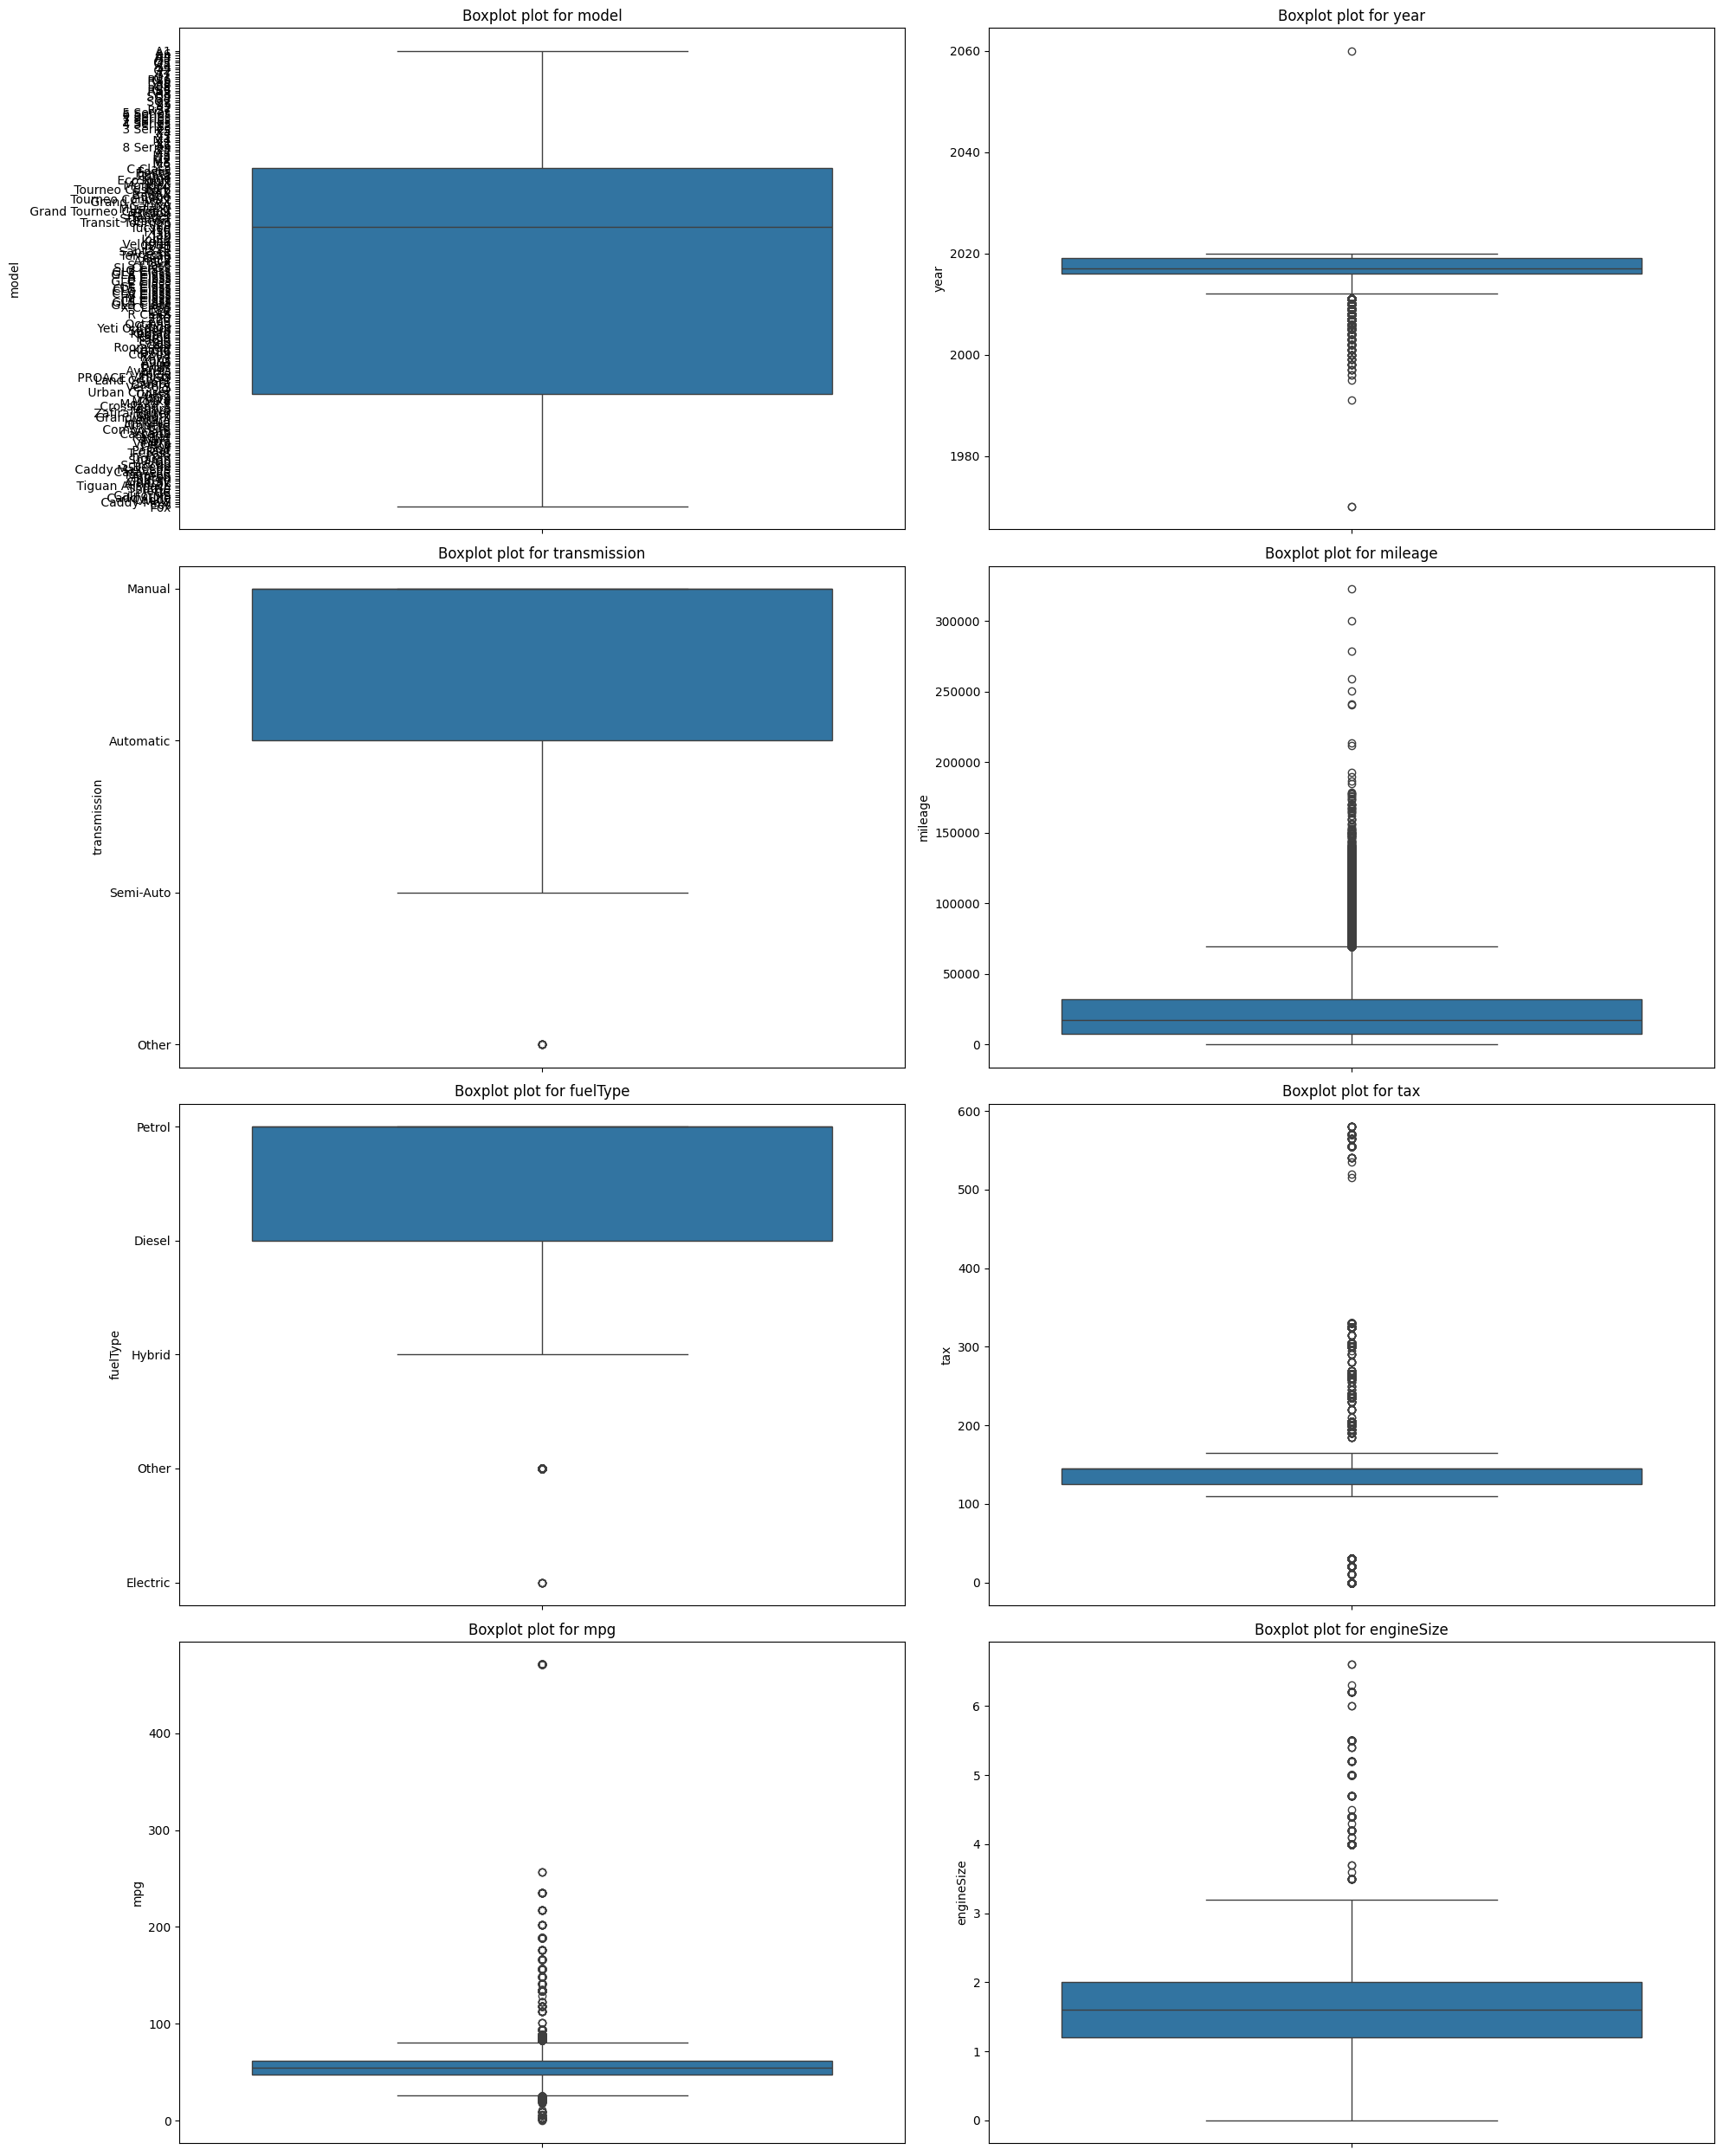

In [31]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.boxplot(y=col,data=data,ax=ax)
    ax.set_title(f'Boxplot plot for {col}')
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.boxplot(y=col,x='price',data=data,ax=ax)
    plt.title(f'Box plot for {col}')
    plt.xlabel('price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

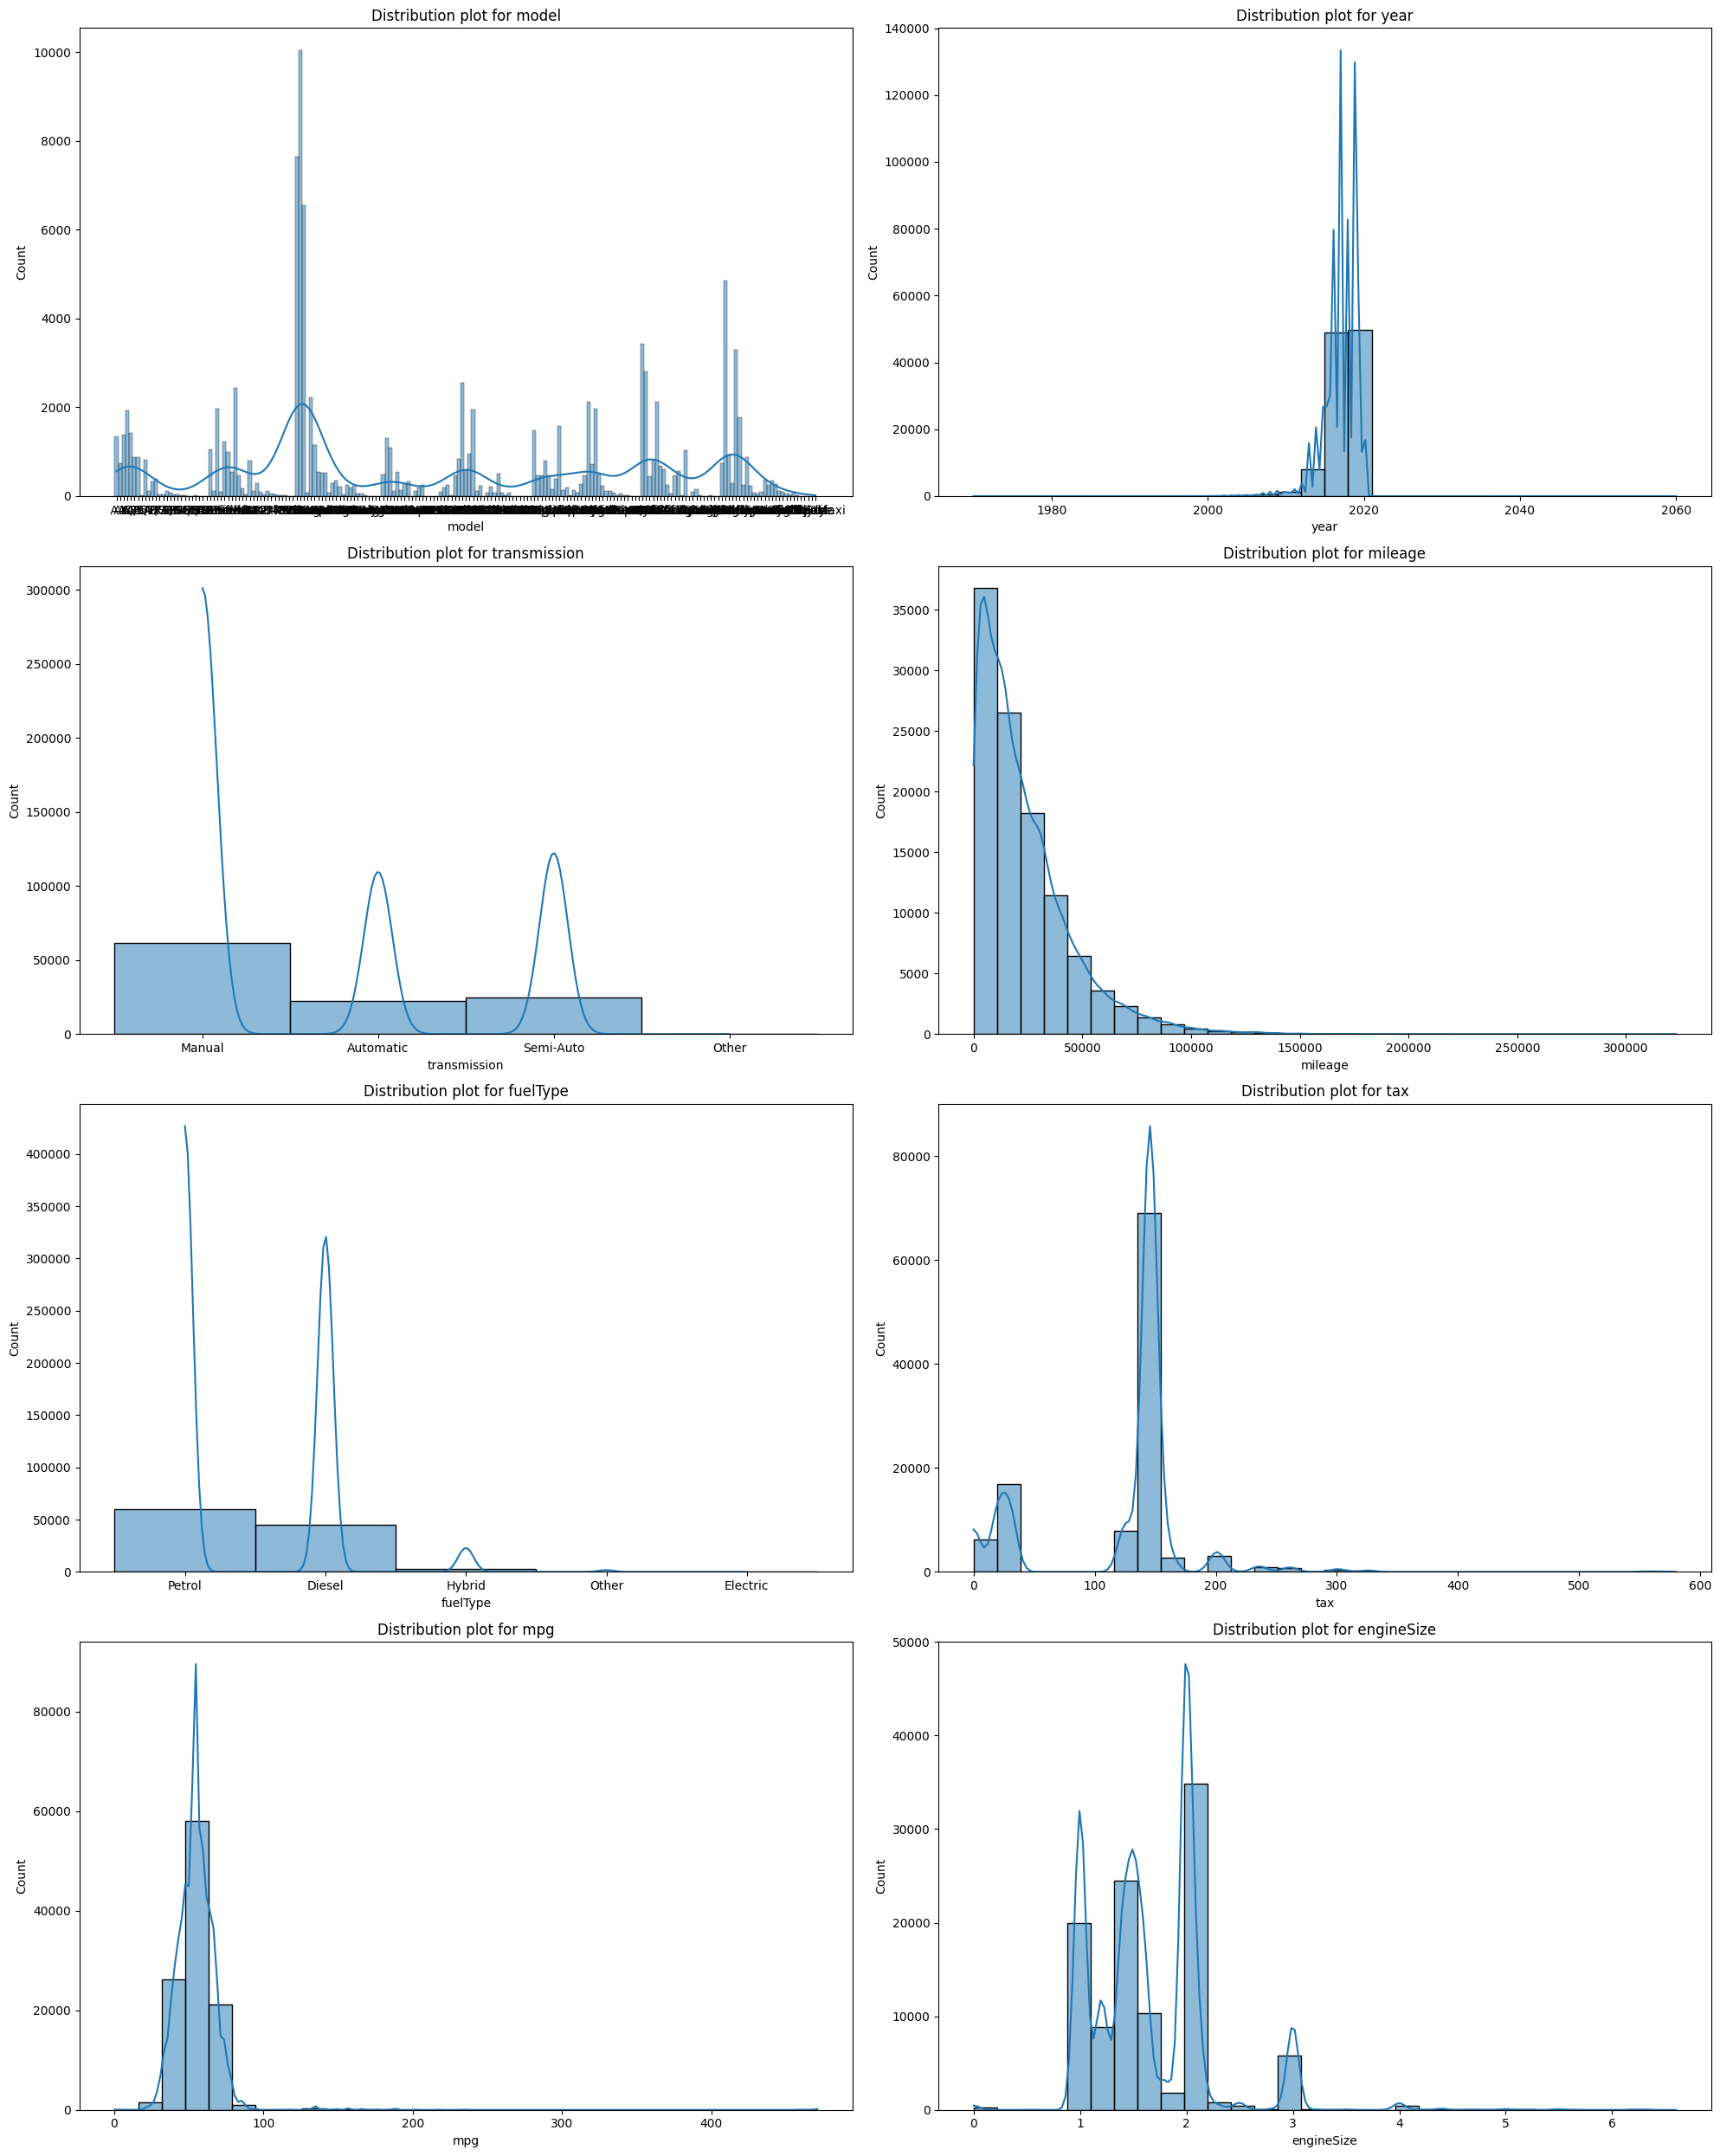

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

data_cols = data.drop(columns=['price']).columns

for ax, col in zip(axes, data_cols):
    sns.histplot(data[col], kde=True,bins=30, ax=ax)
    ax.set_title(f'Distribution plot for {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [33]:
cat_cols=[col for col in data.columns if data[col].dtype==object]
df[cat_cols]

,model,transmission,fuelType,brand
0,C Class,Automatic,Diesel,cclass
1,C Class,Automatic,Petrol,cclass
2,C Class,Automatic,Diesel,cclass
3,C Class,Automatic,Diesel,cclass
4,C Class,Automatic,Diesel,cclass
...,...,...,...,...
3894,C Class,Manual,Diesel,cclass
3895,C Class,Automatic,Diesel,cclass
3896,C Class,Manual,Diesel,cclass
3897,C Class,Automatic,Diesel,cclass


In [34]:
unique={}
for col in cat_cols:
    unique[col]=data[col].unique()

In [35]:
unique

{'model': array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
        ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
        ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
        ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
        ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
        ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
        ' M3', ' M6', ' Z3', ' C Class', ' Focus', ' Fiesta', ' Puma',
        ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+',
        ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect',
        ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
        ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
        ' Escort', ' Transit Tourneo', ' I20', ' Tucson', ' I10', ' IX35',
        ' I30', ' I40', ' Ioniq', ' Kona', ' Veloster', ' I800', ' IX20',
        ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica', ' SLK',
        '

In [103]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
ohe_encoded = ohe.fit(data[['transmission', 'fuelType']])
with open('picklefile_preprocessors/onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

ohe_encoded=ohe.transform(data[['transmission', 'fuelType']])
# Convert to DataFrame
data_encoded = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(['transmission', 'fuelType']))
print(data_encoded)

        transmission_Automatic  transmission_Manual  transmission_Other  \
0                          0.0                  1.0                 0.0   
1                          1.0                  0.0                 0.0   
2                          0.0                  1.0                 0.0   
3                          1.0                  0.0                 0.0   
4                          0.0                  1.0                 0.0   
...                        ...                  ...                 ...   
108535                     0.0                  1.0                 0.0   
108536                     0.0                  1.0                 0.0   
108537                     0.0                  1.0                 0.0   
108538                     0.0                  1.0                 0.0   
108539                     0.0                  1.0                 0.0   

        transmission_Semi-Auto  fuelType_Diesel  fuelType_Electric  \
0                          0.

In [99]:
# Drop the original categorical columns
data_clean = data.drop(columns=['transmission', 'fuelType'])

# Concatenate the encoded DataFrame with the remaining original data
data_clean = pd.concat([data_clean.reset_index(drop=True), data_encoded.reset_index(drop=True)], axis=1)

print(data_clean)

       model  year  price  mileage    tax   mpg  engineSize brand  \
0         A1  2017  12500    15735  150.0  55.4         1.4  Audi   
1         A6  2016  16500    36203   20.0  64.2         2.0  Audi   
2         A1  2016  11000    29946   30.0  55.4         1.4  Audi   
3         A4  2017  16800    25952  145.0  67.3         2.0  Audi   
4         A3  2019  17300     1998  145.0  49.6         1.0  Audi   
...      ...   ...    ...      ...    ...   ...         ...   ...   
108535   Eos  2012   5990    74000  125.0  58.9         2.0    VW   
108536   Fox  2008   1799    88102  145.0  46.3         1.2    VW   
108537   Fox  2009   1590    70000  200.0  42.0         1.4    VW   
108538   Fox  2006   1250    82704  150.0  46.3         1.2    VW   
108539   Fox  2007   2295    74000  145.0  46.3         1.2    VW   

        transmission_Automatic  transmission_Manual  transmission_Other  \
0                          0.0                  1.0                 0.0   
1                    

In [ ]:
"""##One hot encoding
ohe_cols=['transmission','fuelType']
import category_encoders as ce
ohe=ce.OneHotEncoder(ohe_cols,return_df=True,handle_unknown='return_nan',use_cat_names=True)
data_encoded=ohe.fit(data[ohe_cols])
with open('preprocessors/ohe_encoder.pkl','wb') as f:
    pickle.dump(ohe, f)
data_encoded=ohe.transform(data[ohe_cols])
data_encoded"""


,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
108535,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
108536,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108537,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108538,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
with open('picklefile_preprocessors/ohe_encoder.pkl','rb') as f:
    ohe=joblib.load(f)

In [36]:
print(type(ohe))
print(dir(ohe))


<class 'sklearn.preprocessing._encoders.OneHotEncoder'>
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_X', '_check_feature_names', '_check_get_feature_name_combiner', '_check_infrequent_enabled', '_check_n_features', '_compute_n_features_outs', '_compute_transformed_categories', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_drop_idx_after_grouping', '_fit', '_fit_infrequent_category_mapping', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_identify_infrequent', '_

In [37]:
print(ohe.get_feature_names_out(['transmission', 'fuelType']))


['transmission_Automatic' 'transmission_Manual' 'transmission_Other'
 'transmission_Semi-Auto' 'fuelType_Diesel' 'fuelType_Electric'
 'fuelType_Hybrid' 'fuelType_Other' 'fuelType_Petrol']


In [ ]:
"""with open('preprocessors/ohe_encoder.pkl', 'wb') as f:
    cloudpickle.dump(ohe, f)"""

## Converting model column into numerical values using target encoding

In [104]:
model_encoding = data_clean.groupby('model')['price'].mean().to_dict()
brand_encoding = data_clean.groupby('brand')['price'].mean().to_dict()

# Apply encoding
data_clean['model_encoded'] = data_clean['model'].map(model_encoding)
data_clean['brand_encoded'] = data_clean['brand'].map(brand_encoding)

print(data_clean[['model_encoded', 'brand_encoded']])

        model_encoded  brand_encoded
0        14327.750557   22896.685039
1        22695.385027   22896.685039
2        14327.750557   22896.685039
3        20255.450398   22896.685039
4        17408.522032   22896.685039
...               ...            ...
108535    6616.428571   16838.952365
108536    1733.500000   16838.952365
108537    1733.500000   16838.952365
108538    1733.500000   16838.952365
108539    1733.500000   16838.952365

[108540 rows x 2 columns]


In [ ]:
"""target_encoder = ce.TargetEncoder(cols=['model', 'brand'], handle_unknown='return_nan')

encoded_values = target_encoder.fit_transform(data_clean[['model', 'brand']], data_clean['price'])

data_clean[['model_encoded', 'brand_encoded']] = encoded_values[['model', 'brand']]
data_clean[['model_encoded', 'brand_encoded']].head()"""

,model_encoded,brand_encoded
0,14327.750557,22896.685039
1,22695.385027,22896.685039
2,14327.750557,22896.685039
3,20255.450398,22896.685039
4,17408.522032,22896.685039


In [31]:
data_clean.columns

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'brand', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol', 'model_encoded', 'brand_encoded'],
      dtype='object')

In [105]:
with open('picklefile_preprocessors/mean_encoder.pkl', 'wb') as f:
    pickle.dump(model_encoding, f)

In [106]:
with open('picklefile_preprocessors/brand_encoder.pkl', 'wb') as f:
    pickle.dump(brand_encoding, f)

In [41]:
data_clean.drop(columns=['model','brand'],inplace=True)
data_clean

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric,model_encoded,brand_encoded
0,2017,12500,15735,150.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
1,2016,16500,36203,20.0,64.2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22695.385027,22896.685039
2,2016,11000,29946,30.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
3,2017,16800,25952,145.0,67.3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20255.450398,22896.685039
4,2019,17300,1998,145.0,49.6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17408.522032,22896.685039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108535,2012,5990,74000,125.0,58.9,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14689.857881,16838.952365
108536,2008,1799,88102,145.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14344.089863,16838.952365
108537,2009,1590,70000,200.0,42.0,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14344.089863,16838.952365
108538,2006,1250,82704,150.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14344.089863,16838.952365


In [42]:
data_clean.to_csv('processed_data/preprocessed_data.csv',index=False)

In [2]:
data_clean=pd.read_csv('processed_data/preprocessed_data.csv')
data_clean.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric,model_encoded,brand_encoded
0,2017,12500,15735,150.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
1,2016,16500,36203,20.0,64.2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22695.385027,22896.685039
2,2016,11000,29946,30.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
3,2017,16800,25952,145.0,67.3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20255.450398,22896.685039
4,2019,17300,1998,145.0,49.6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17408.522032,22896.685039


In [3]:
from scipy.stats import zscore
columns_to_check=['mileage','tax','mpg','engineSize']
z_scores=np.abs(zscore(data_clean[columns_to_check]))
data_clean1=data_clean[(z_scores < 3).all(axis=1)]
print(f"Before: {data_clean.shape}\nAfter: {data_clean1.shape}")

Before: (108540, 17)
After: (105116, 17)


In [4]:
x=data_clean1.drop('price',axis=1)
y=data_clean1['price']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
cols_to_be_scaled=['year','mileage','tax','mpg','engineSize']

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=x_train.copy()
x_test_sc=x_test.copy()
x_train_sc[cols_to_be_scaled]=sc.fit_transform(x_train_sc[cols_to_be_scaled])
x_test_sc[cols_to_be_scaled]=sc.fit_transform(x_test_sc[cols_to_be_scaled])

In [49]:
lr_model=LinearRegression()
lr_model.fit(x_train_sc,y_train)

LinearRegression()

In [50]:
y_pred=lr_model.predict(x_test_sc)
y_pred

array([ 8791.8171313 , 16647.67017333, 15419.05645512, ...,
        8469.51108088, 18422.87088971,  3091.15615373])

In [51]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MSE: 10722418.888545947
MAE: 2318.3836595950347
RMSE: 3274.5104807506646
R2 Score: 0.8659961548371433


## Implementing Lasso Regression

In [52]:
lasso_model=Lasso(random_state=42)
lasso_model.fit(x_train_sc,y_train)

Lasso(random_state=42)

In [53]:
y_pred=lasso_model.predict(x_test_sc)
y_pred

array([ 8797.79777534, 16661.98045136, 15424.8646375 , ...,
        8474.00332262, 18416.78975101,  3096.21202929])

In [54]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 10724956.363654016
MAE: 2318.3845407731433
RMSE: 3274.897916524119
R2 Score: 0.8659644426437454


## Ridge Regression

In [55]:
ridge_model=Ridge(random_state=42)
ridge_model.fit(x_train_sc,y_train)

Ridge(random_state=42)

In [56]:
y_pred=ridge_model.predict(x_test_sc)
y_pred

array([ 8791.90072779, 16647.81834485, 15419.10832055, ...,
        8469.58073371, 18422.82769341,  3091.23507063])

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 10722412.67110769
MAE: 2318.3789241597965
RMSE: 3274.5095313814086
R2 Score: 0.8659962325398185


## ElasticNet

In [58]:
elasticnet_model=ElasticNet(random_state=42)
elasticnet_model.fit(x_train_sc,y_train)

ElasticNet(random_state=42)

In [59]:
y_pred=elasticnet_model.predict(x_test_sc)
y_pred

array([ 9347.894764  , 16547.73125154, 16426.24682014, ...,
        8751.09546212, 17712.03784296,  3894.39291699])

In [61]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 12788082.903421963
MAE: 2445.027772500371
RMSE: 3576.042911294824
R2 Score: 0.8401804388419749


## Implementing Hyperparameter tuning for lasso regression

In [39]:
def objective(trial):
    alpha=trial.suggest_float('alpha',1e-4,10.0,log=True)
    model=Lasso(alpha=alpha,random_state=42,max_iter=10000)
    
    score=cross_val_score(model,x_train_sc,y_train,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1).mean()
    return -score
study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=10,n_jobs=1)
best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')
    

[I 2025-05-13 11:39:03,622] A new study created in memory with name: no-name-415bdf4d-d5de-4884-a368-b4e24bb21518
[I 2025-05-13 11:39:53,238] Trial 0 finished with value: 2343.378547224841 and parameters: {'alpha': 0.022820701973424475}. Best is trial 0 with value: 2343.378547224841.
[I 2025-05-13 11:40:24,991] Trial 1 finished with value: 2343.340991735871 and parameters: {'alpha': 0.0841810664281076}. Best is trial 1 with value: 2343.340991735871.
[I 2025-05-13 11:41:17,772] Trial 2 finished with value: 2343.390091117937 and parameters: {'alpha': 0.0026023111596740426}. Best is trial 1 with value: 2343.340991735871.
[I 2025-05-13 11:42:01,109] Trial 3 finished with value: 2343.3870677962186 and parameters: {'alpha': 0.007614205725225323}. Best is trial 1 with value: 2343.340991735871.
[I 2025-05-13 11:42:40,030] Trial 4 finished with value: 2343.3762322483567 and parameters: {'alpha': 0.026918475935369793}. Best is trial 1 with value: 2343.340991735871.
[I 2025-05-13 11:42:40,587] Tr

Best parameters: {'alpha': 9.887647526094035}
Best value: 2341.4446054658015


In [40]:
lasso_model_tuned=Lasso(**best_params)
lasso_model_tuned.fit(x_train_sc,y_train)

Lasso(alpha=9.887647526094035)

In [41]:
y_pred=lasso_model_tuned.predict(x_test_sc)
y_pred

array([24029.69963672, 11949.81552997, 15363.48139367, ...,
       15466.36295646, 31626.70026368, 24434.81459819])

In [42]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 10707617.603412764
MAE: 2319.5647256516077
RMSE: 3272.2496242512984
R2 Score: 0.870750023904896


## Random Forest Regressor

In [8]:
x1=data_clean.drop('price',axis=1)
y1=data_clean['price']
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [66]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train1,y_train1)

RandomForestRegressor()

In [70]:
y_pred=rf_model.predict(x_test1)
y_pred

array([20786.89, 17061.88, 23539.11, ..., 11035.18, 12609.33,  7049.11])

In [71]:
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=root_mean_squared_error(y_test1,y_pred)
r2=r2_score(y_test1,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3519319.12590108
MAE: 1135.567227478971
RMSE: 1875.9848415968293
R2 Score: 0.9645838952603613


## Gradient Boosting Regressor

In [73]:
gbr_model=GradientBoostingRegressor(random_state=42)
gbr_model.fit(x_train1,y_train1)

GradientBoostingRegressor(random_state=42)

In [74]:
y_pred=gbr_model.predict(x_test1)
y_pred

array([18644.68975936, 16030.2733713 , 25527.69776336, ...,
       11569.57900387, 10558.84831166,  6695.92275483])

In [75]:
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=root_mean_squared_error(y_test1,y_pred)
r2=r2_score(y_test1,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 6647197.352591646
MAE: 1669.3733752348007
RMSE: 2578.2159243538244
R2 Score: 0.9331069933579385


## AdaBoost Regressor

In [84]:
ada_model=AdaBoostRegressor(random_state=42)
ada_model.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [85]:
y_pred=ada_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 18825828.621083982
MAE: 3333.4525381895896
RMSE: 4338.874119064067
R2 Score: 0.7647234779927238


In [82]:
ada_model2=AdaBoostRegressor(random_state=42)
ada_model2.fit(x_train1,y_train1)

AdaBoostRegressor(random_state=42)

In [83]:
y_pred=ada_model2.predict(x_test1)
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=root_mean_squared_error(y_test1,y_pred)
r2=r2_score(y_test1,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 98905610.75898302
MAE: 7945.956138928745
RMSE: 9945.13000211576
R2 Score: 0.004679216443259637


#### Note: AdaBoost model is performing better with no outliers

## Hyperparameter Tuning of AdaBoost Regressor

In [ ]:
def objective(trial):
    dt_params={
        'criterion':trial.suggest_categorical('criterion',["squared_error", "friedman_mse", "absolute_error"]),
        'max_depth':trial.suggest_int('max_depth',1,10),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2']),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',5,20)

    }
    ada_params={
        'n_estimators':trial.suggest_int('n_estimators',50,150),
        'learning_rate':trial.suggest_float('learning_rate',1e-4,0.1,log=True),
        
    }
    
    dt_model=DecisionTreeRegressor(random_state=42,**dt_params)
    model=AdaBoostRegressor(dt_model,random_state=42,**ada_params)
    
    score = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1).mean()

    return -score

study=optuna.create_study(direction='minimize',pruner=SuccessiveHalvingPruner(min_resource=1, reduction_factor=4))
study.optimize(objective,n_trials=50,n_jobs=1)


dt_keys=['criterion','max_depth','max_features','min_samples_leaf']
ada_keys=['n_estimators','learning_rate']

best_params = study.best_trial.params
best_dt_params = {k: best_params[k] for k in dt_keys}
best_ada_params = {k: best_params[k] for k in ada_keys}


print("Best DecisionTreeRegressor Params:", best_dt_params)
print("Best AdaBoostRegressor Params:", best_ada_params)

In [ ]:
dt_model=DecisionTreeRegressor(random_state=42,**best_dt_params)
ada_model_tuned=AdaBoostRegressor(dt_model,random_state=42,**best_ada_params)
ada_model_tuned.fit(x_train,y_train)

In [ ]:
y_pred=ada_model_tuned.predict(x_test)
y_pred

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

In [56]:
x=data_clean.drop('price',axis=1)
y=data_clean['price']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## XGBoost Regressor

In [86]:
xgb_model=XGBRegressor(random_state=42)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred=xgb_model.predict(x_test)
y_pred

array([ 9284.925 , 18341.936 , 15052.428 , ...,  8136.7803, 15442.627 ,
        5951.2   ], dtype=float32)

In [88]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3071239.0
MAE: 1162.690185546875
RMSE: 1752.4951171875
R2 Score: 0.9616170525550842


In [90]:
xgb_model2=XGBRegressor(random_state=42)
xgb_model2.fit(x_train1,y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
y_pred=xgb_model.predict(x_test1)
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=root_mean_squared_error(y_test1,y_pred)
r2=r2_score(y_test1,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 7361291.5
MAE: 1249.71044921875
RMSE: 2713.169921875
R2 Score: 0.925920844078064


## Hyperparameter Tuning of XGBRegressor Using Optuna
- Evaluating Whether XGBoost Outperforms Random Forest with Optimized Hyperparameters

In [9]:
def objective(trial):
    params={
    'n_estimators':trial.suggest_int('n_estimators',50,300),
    'max_depth':trial.suggest_int('max_depth',1,20),
    'learning_rate':trial.suggest_float('learning_rate',1e-5,0.1,log=True),
    'booster':trial.suggest_categorical('booster',['gbtree', 'gblinear','dart']),
    "subsample": trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
    "gamma": trial.suggest_float("gamma", 0, 5),
    "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
    "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
    
    
    model=XGBRegressor(random_state=42,**params)
    score=cross_val_score(model,x_train1,y_train1,scoring='neg_mean_squared_error',n_jobs=-1).mean()
    return -score
study=optuna.create_study(direction='minimize',study_name='XGB tuning',pruner=SuccessiveHalvingPruner())
study.optimize(objective,n_trials=50,n_jobs=1)

best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')

[I 2025-05-29 16:31:33,883] A new study created in memory with name: XGB tuning
[I 2025-05-29 16:31:54,237] Trial 0 finished with value: 33313414.0 and parameters: {'n_estimators': 216, 'max_depth': 8, 'learning_rate': 0.017039044680502023, 'booster': 'gblinear', 'subsample': 0.9936536981875508, 'colsample_bytree': 0.7376024738612722, 'gamma': 4.228326020387784, 'reg_alpha': 0.40629156461156724, 'reg_lambda': 1.4289592643566629}. Best is trial 0 with value: 33313414.0.
[I 2025-05-29 16:41:27,429] Trial 1 finished with value: 87472470.4 and parameters: {'n_estimators': 204, 'max_depth': 12, 'learning_rate': 0.00020915284792398162, 'booster': 'dart', 'subsample': 0.9013088133740694, 'colsample_bytree': 0.6966579915342258, 'gamma': 3.73345520741369, 'reg_alpha': 0.3070537207253454, 'reg_lambda': 4.2428864805878055}. Best is trial 0 with value: 33313414.0.
[I 2025-05-29 16:41:31,344] Trial 2 finished with value: 34012765.2 and parameters: {'n_estimators': 101, 'max_depth': 6, 'learning_rat

Best parameters: {'n_estimators': 128, 'max_depth': 14, 'learning_rate': 0.06438048349478122, 'booster': 'dart', 'subsample': 0.8974826984436378, 'colsample_bytree': 0.9541150232754411, 'gamma': 2.362551650733274, 'reg_alpha': 9.491183570041555, 'reg_lambda': 7.919519120890231}
Best value: 3412113.0


In [93]:
print(f"Best RMSE: {np.sqrt(best_value):.2f}")

Best RMSE: 1727.91


In [10]:
xgb_model_tuned=XGBRegressor(random_state=42,**best_params)
xgb_model_tuned.fit(x_train1,y_train1)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9541150232754411, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=2.362551650733274, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06438048349478122,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=128, n_jobs=None,
             num_parallel_tree=None, ...)

In [11]:
y_pred=xgb_model_tuned.predict(x_test1)
y_pred

array([20004.648, 17825.738, 24355.89 , ..., 11326.987, 12320.404,
        7104.459], dtype=float32)

In [ ]:
3071239

In [12]:
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=root_mean_squared_error(y_test1,y_pred)
r2=r2_score(y_test1,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3259594.5
MAE: 1086.4278564453125
RMSE: 1805.4346923828125
R2 Score: 0.967197597026825


In [13]:
import joblib
joblib.dump(xgb_model_tuned, 'models/best_xgb_model.pkl')

['models/best_xgb_model.pkl']

## Lightgbm

In [58]:
lgbm_model=LGBMRegressor(random_state=42)
lgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 75926, number of used features: 13
[LightGBM] [Info] Start training from score 17853.218068


LGBMRegressor(random_state=42)

In [59]:
y_pred=lgbm_model.predict(x_test)
y_pred

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([11986.25504808, 14140.09626632, 30291.41301478, ...,
        9046.9996356 ,  9636.15211246,  9899.03380809], shape=(18982,))

In [60]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 4617167.579179222
MAE: 1449.5971044887176
RMSE: 2148.759544290431
R2 Score: 0.9530929986216545


## Hyperparameter Tuning of Light Gradient Boosting

In [69]:
def objective(trial):
    params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
    }

    model = LGBMRegressor(random_state=42, **params)
    score = cross_val_score(model, x_train, y_train,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

study=optuna.create_study(direction='minimize',study_name='Lightgbm tuning',pruner=SuccessiveHalvingPruner())
study.optimize(objective,n_trials=50,n_jobs=1)

best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')

[I 2025-05-11 15:22:26,103] A new study created in memory with name: Lightgbm tuning


[I 2025-05-11 15:23:11,209] Trial 0 finished with value: 27452659.56517607 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.004421972895925516, 'n_estimators': 212, 'subsample': 0.9894507170936736, 'colsample_bytree': 0.8148084046658308, 'reg_alpha': 6.008891353188808, 'reg_lambda': 6.616482253867758, 'min_child_samples': 100, 'num_leaves': 31, 'min_split_gain': 0.8087062691011093}. Best is trial 0 with value: 27452659.56517607.
[I 2025-05-11 15:23:20,591] Trial 1 finished with value: 19027449.03327668 and parameters: {'boosting_type': 'gbdt', 'max_depth': 2, 'learning_rate': 0.018540834508398142, 'n_estimators': 143, 'subsample': 0.9046299772706711, 'colsample_bytree': 0.6425883218963555, 'reg_alpha': 5.651680800190721, 'reg_lambda': 8.412067961864349, 'min_child_samples': 7, 'num_leaves': 144, 'min_split_gain': 0.8115235368714421}. Best is trial 1 with value: 19027449.03327668.
[I 2025-05-11 15:23:30,295] Trial 2 finished with value: 98753137.23924744 and 

Best parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.07049810564250442, 'n_estimators': 293, 'subsample': 0.9968443957817286, 'colsample_bytree': 0.7636219664130353, 'reg_alpha': 0.5191114726482229, 'reg_lambda': 3.6743266777027217, 'min_child_samples': 12, 'num_leaves': 110, 'min_split_gain': 0.04142340374071962}
Best value: 4187623.328198327


In [70]:
lgbm_model_tuned=LGBMRegressor(random_state=42,**best_params)
lgbm_model_tuned.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 75926, number of used features: 13
[LightGBM] [Info] Start training from score 17853.218068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMRegressor(colsample_bytree=0.7636219664130353,
              learning_rate=0.07049810564250442, max_depth=10,
              min_child_samples=12, min_split_gain=0.04142340374071962,
              n_estimators=293, num_leaves=110, random_state=42,
              reg_alpha=0.5191114726482229, reg_lambda=3.6743266777027217,
              subsample=0.9968443957817286)

In [71]:
y_pred=lgbm_model_tuned.predict(x_test)
y_pred

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([12451.60630148, 14131.26807399, 29717.75899698, ...,
        9342.78312241,  9679.62806163,  9636.29887342], shape=(18982,))

In [72]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3509431.1766292276
MAE: 1215.7614356016654
RMSE: 1873.3475856416042
R2 Score: 0.9643467796616948
